In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector , ColumnTransformer 
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.preprocessing import StandardScaler , FunctionTransformer
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
url = 'https://archive.ics.uci.edu/static/public/165/data.csv'

concrete_df = pd.read_csv(url)

In [3]:
concrete_df.to_csv("concrete_compressive_strength.csv" , index=False)

In [4]:
concrete_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
concrete_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete_df.isnull().sum()
# no missing values 

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

array([[<Axes: title={'center': 'Cement'}>,
        <Axes: title={'center': 'Blast Furnace Slag'}>,
        <Axes: title={'center': 'Fly Ash'}>],
       [<Axes: title={'center': 'Water'}>,
        <Axes: title={'center': 'Superplasticizer'}>,
        <Axes: title={'center': 'Coarse Aggregate'}>],
       [<Axes: title={'center': 'Fine Aggregate'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Concrete compressive strength'}>]],
      dtype=object)

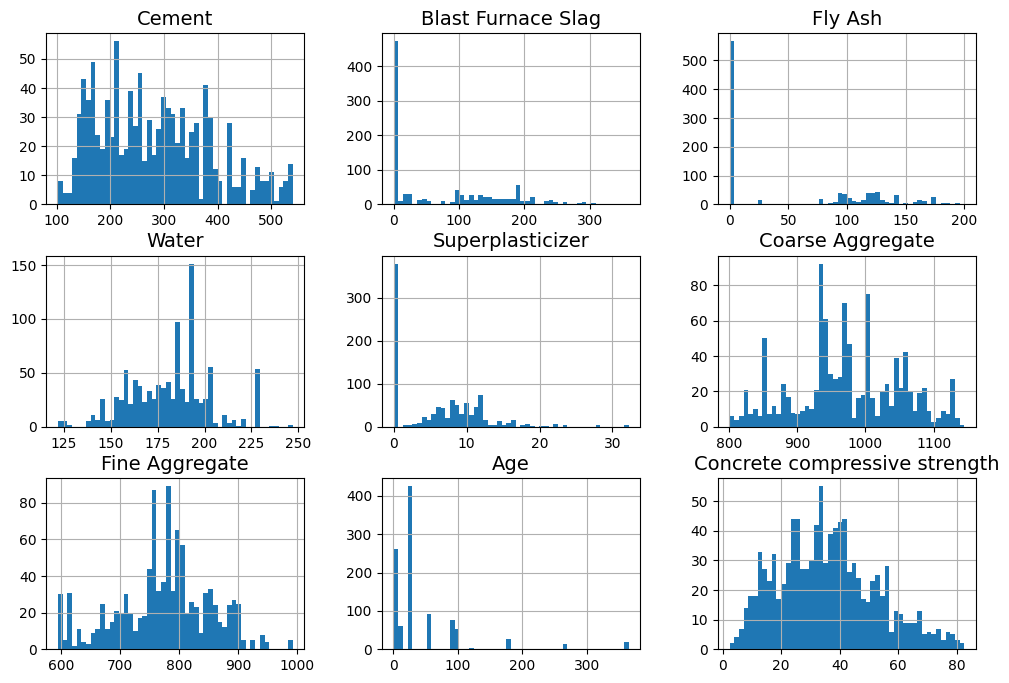

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

concrete_df.hist(bins=50, figsize=(12, 8))

In [8]:
corr_matrix = concrete_df.corr()
corr_matrix["Concrete compressive strength"].sort_values(ascending=False)

Concrete compressive strength    1.000000
Cement                           0.497832
Superplasticizer                 0.366079
Age                              0.328873
Blast Furnace Slag               0.134829
Fly Ash                         -0.105755
Coarse Aggregate                -0.164935
Fine Aggregate                  -0.167241
Water                           -0.289633
Name: Concrete compressive strength, dtype: float64

In [9]:
concrete_df["Blast Furnace Slag_ratio"] = concrete_df['Cement']/concrete_df['Blast Furnace Slag']

In [10]:
concrete_df["Blast Furnace Slag_ratio"] = concrete_df["Blast Furnace Slag_ratio"].replace(np.inf , 0)

In [11]:
concrete_df["water_ratio"] = concrete_df["Cement"]/concrete_df["Water"]

In [12]:
concrete_df["Coarse Aggregate_ratio"] = concrete_df["Cement"]/concrete_df["Coarse Aggregate"]

In [13]:
concrete_df["Fine Aggregate_ratio"] = concrete_df['Cement']/concrete_df["Fine Aggregate"]

In [14]:
concrete_df["Fly Ash_ratio"] = concrete_df["Cement"]/concrete_df["Fly Ash"]

In [15]:
concrete_df["Superplasticizer_ratio"] = concrete_df["Cement"]/concrete_df["Superplasticizer"]

In [16]:
concrete_df["mix"] = concrete_df["Cement"]/(concrete_df["Coarse Aggregate"]+concrete_df["Fine Aggregate"]+concrete_df["Fly Ash"]+concrete_df["Superplasticizer"]+concrete_df["Water"])

In [17]:
conc_df = pd.read_csv("concrete_compressive_strength.csv")

In [18]:
target = conc_df["Concrete compressive strength"].copy()

features = conc_df.drop(["Concrete compressive strength"],axis=1)


In [19]:
target

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength, Length: 1030, dtype: float64

In [20]:
features

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [21]:
features.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [22]:
X_tran,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [23]:
X_tran.shape

(824, 8)

In [24]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer class to add features and calculate the ratio
class AddAndRatio(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_add, ratio_feature):
        self.features_to_add = features_to_add
        self.ratio_feature = ratio_feature
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Add the selected features
        added_features = X[self.features_to_add].sum(axis=1)
        
        # Avoid division by zero by replacing 0s in the ratio feature with a small value
        safe_ratio_feature = X[self.ratio_feature].replace(0, np.finfo(float).eps)
        
        # Calculate the ratio
        ratio = safe_ratio_feature / added_features
        
        # Return the ratio as a DataFrame or 2D array
        return ratio.values.reshape(-1, 1)


In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class RatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, numerator_feature, denominator_feature):
        self.numerator_feature = numerator_feature
        self.denominator_feature = denominator_feature
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Extract the numerator and denominator columns
        numerator = X[self.numerator_feature]
        denominator = X[self.denominator_feature]
        
        # Avoid division by zero by replacing 0s in the denominator with a small value
        safe_denominator = denominator.replace(0, np.finfo(float).eps)
        
        # Calculate the ratio
        ratio = numerator / safe_denominator
        
        # Return the ratio as a DataFrame or 2D array
        return ratio.values.reshape(-1, 1)


In [26]:
from sklearn.pipeline import Pipeline

# Define the pipeline that uses the custom RatioTransformer
def create_ratio_pipeline(numerator, denominator):
    return Pipeline([
        ('ratio', RatioTransformer(numerator_feature=numerator, denominator_feature=denominator)),
        ('scaler',StandardScaler())
    ])
    


In [27]:
ratio_pipeline1 = create_ratio_pipeline('Cement','Water')
ratio_pipeline2 = create_ratio_pipeline('Cement','Fine Aggregate')


In [28]:
from sklearn.pipeline import Pipeline

# Define the pipeline that uses the custom AddAndRatio transformer
ratio_pipeline = Pipeline([
    ('add_and_ratio', AddAndRatio(features_to_add=['Fine Aggregate', 'Fly Ash', 'Coarse Aggregate', 'Superplasticizer'], ratio_feature='Cement')),
    ('scaler',StandardScaler())
    
])


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Example DataFrame

# Define the ColumnTransformer
column_transformer = ColumnTransformer(transformers=[
    ('ratio_pipeline', ratio_pipeline, ['Fine Aggregate', 'Fly Ash', 'Coarse Aggregate', 'Superplasticizer', 'Cement']),
    
    
])

# Apply the ColumnTransformer to the DataFrame
result = column_transformer.fit_transform(concrete_df)

# Convert result to a DataFrame if needed


In [30]:

    
log_pipeline = make_pipeline(

    FunctionTransformer(np.log,feature_names_out="one-to-one"),
    StandardScaler()
)


default_num_pipleine = make_pipeline(StandardScaler())

preprocessing = ColumnTransformer([
("FA_ratio",ratio_pipeline2,["Cement","Fine Aggregate"]),
("Water_ratio",ratio_pipeline1,["Cement","Water"]),
("log",log_pipeline,["Cement","Coarse Aggregate","Fine Aggregate","Water"]),
('ratio_pipeline', ratio_pipeline, ['Fine Aggregate', 'Fly Ash', 'Coarse Aggregate', 'Superplasticizer', 'Cement']),
],

remainder = default_num_pipleine)

In [31]:
prep = preprocessing.fit(X_tran)

In [32]:
lr = make_pipeline(preprocessing,LinearRegression())
lr.fit(X_tran,y_train)

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('FA_ratio',
                                                  Pipeline(steps=[('ratio',
                                                                   RatioTransformer(denominator_feature='Fine '
                                                                                                        'Aggregate',
                                                                                    numerator_feature='Cement')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Cement', 'Fine Aggregate']),
                                                 ('Water_ratio',
                                                  Pipeline(steps=[('ratio...
                                                  ['Cement', 'Coarse Aggregate',
                                                   'Fine Aggregate', 'Water']),
                                                 ('ratio_pipeline',
                                                  Pipeline(steps=[('add_and_ratio',
                                                                   AddAndRatio(features_to_add=['Fine '
                                                                                                'Aggregate',
                                                                                                'Fly '
                                                                                                'Ash',
                                                                                                'Coarse '
                                                                                                'Aggregate',
                                                                                                'Superplasticizer'],
                                                                               ratio_feature='Cement')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fine Aggregate', 'Fly Ash',
                                                   'Coarse Aggregate',
                                                   'Superplasticizer',
                                                   'Cement'])])),
                ('linearregression', LinearRegression())])

In [33]:
preds=lr.predict(X_tran)
preds[:5]


array([32.08701131, 48.35793415, 34.01288389, 34.13392557, 23.57401109])

In [34]:
y_train[:5]

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
Name: Concrete compressive strength, dtype: float64

In [35]:
acc = r2_score(y_train,preds)
acc

0.5907548491541083

In [37]:
rf = make_pipeline(preprocessing,RandomForestRegressor())
rf.fit(X_tran,y_train)

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('FA_ratio',
                                                  Pipeline(steps=[('ratio',
                                                                   RatioTransformer(denominator_feature='Fine '
                                                                                                        'Aggregate',
                                                                                    numerator_feature='Cement')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Cement', 'Fine Aggregate']),
                                                 ('Water_ratio',
                                                  Pipeline(steps=[('ratio...
                                                   'Fine Aggregate', 'Water']),
                                                 ('ratio_pipeline',
                                                  Pipeline(steps=[('add_and_ratio',
                                                                   AddAndRatio(features_to_add=['Fine '
                                                                                                'Aggregate',
                                                                                                'Fly '
                                                                                                'Ash',
                                                                                                'Coarse '
                                                                                                'Aggregate',
                                                                                                'Superplasticizer'],
                                                                               ratio_feature='Cement')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fine Aggregate', 'Fly Ash',
                                                   'Coarse Aggregate',
                                                   'Superplasticizer',
                                                   'Cement'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [38]:
preds = rf.predict(X_tran)

acc = r2_score(y_true=y_train,y_pred=preds)
acc

0.986370813989781

In [39]:
preds = rf.predict(X_test)

acc = r2_score(y_test,preds)
acc

0.8826998787332454